Chỉnh sửa các thành phần trong đồ thị
=============================================================



#### _Các phương thức text cơ bản được Axes hỗ trợ:_

In [ ]:
* `text()`       : thêm text tại một vị trí tùy ý để các trục. 

* `set_xlabel()` : thêm một nhãn vào trục x.

* `set_ylabel()` : thêm một nhãn vào trục y.

* `set_title()`  : thêm tiêu đề cho các trục.

* `annotate()`   : thêm một chú thích, với mũi tên tùy chọn, đến các Axes

#### _Hoặc được Figure hỗ trợ:_

* `text()`       : thêm text tại vị trí tùy ý vào hình.

* `suptitle()`   : thêm tiêu đề vào hình.



### 1. Ví dụ 1: Thêm nhãn cho các trục để mô tả ý nghĩa các trục

In [1]:
import matplotlib.pyplot as plt

days = list(range(1,9))

celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]

fig,ax = plt.subplots()

ax.plot(days, celsius_values)
ax.set_xlabel('Day')
ax.set_ylabel('Degrees Celsius')

plt.show()

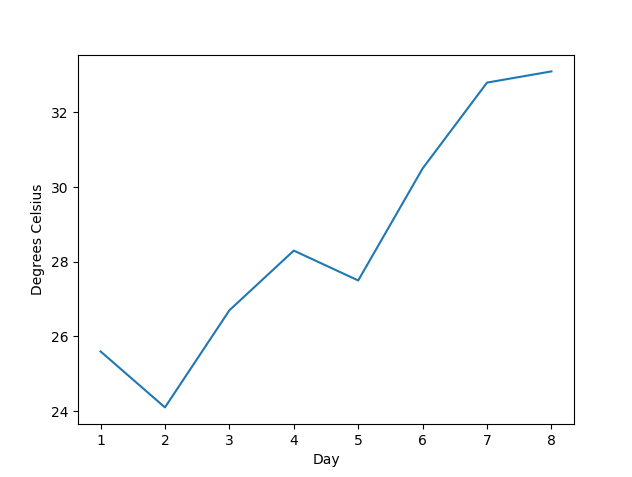

_Cách khác cho VD1:_

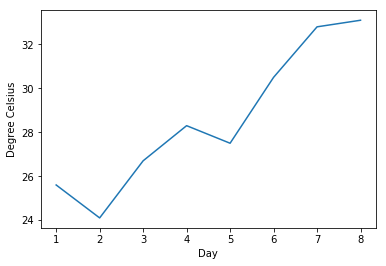

In [2]:
import matplotlib.pyplot as plt

days = list(range(1,9))

celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]

plt.plot(days, celsius_values)
plt.xlabel('Day')
plt.ylabel('Degree Celsius')

plt.show()


### 2. Ví dụ 2: Vẽ đồ thị trong đó biểu diễn nhiều đường trên hai thang đo khác nhau

Trong ví dụ này: thang đo bên trái là cm và thang đo bên phải là cm2

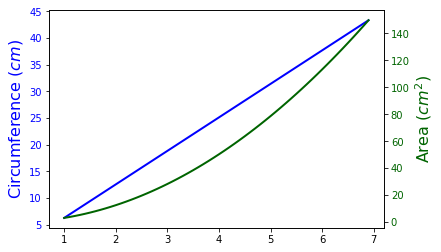

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

x = np.arange(1,7,0.1)

ax1.plot(x, 2*np.pi*x, lw=2, color='blue')
ax1.set_ylabel(r"Circumference $(cm)$", fontsize=16, color='blue')

for label in ax1.get_yticklabels():
    label.set_color('blue')
    
ax2 = ax1.twinx()
ax2.plot(x, np.pi*x**2, lw=2, color='darkgreen')
ax2.set_ylabel(r'Area $(cm^2)$', fontsize=16, color='darkgreen')

for label in ax2.get_yticklabels():
    label.set_color('darkgreen')
    
plt.show()

### 3. Text, Transforms and Text Position

Cho ví dụ có dữ liệu là tỉ lệ sinh từ năm 1969 đến năm 1988.

Ta cần một đồ thị mô tả tỷ lệ sinh trung bình trong khoảng thời gian một năm (365 ngày).

Link data: "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"

KeyError: '2012-1-1'

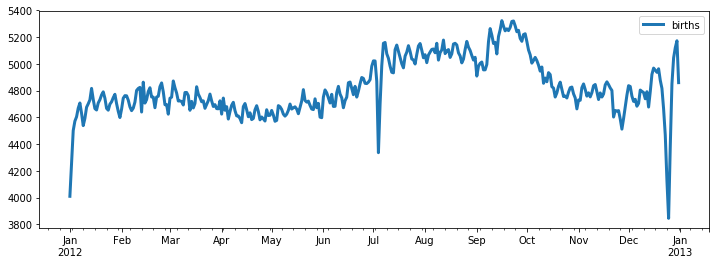

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import io
import requests
import numpy as np

url="https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"

#Clean data
s=requests.get(url).content

births = pd.read_csv(io.StringIO(s.decode('utf-8')))

quartiles = np.percentile(births['births'], [25, 50, 75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +100 * births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',[births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

#Draw plot 
fig, ax = plt.subplots(figsize=(12,4))
# births_by_date.plot(ax=ax)

#chu thich tren do thi 
births_by_date.plot(ax=ax, lw=3)

style = dict(size=10, color='black', 
             fontsize=3,fontweight='bold')

dates = [['2012-1-1', "New Year's Day"], 
         ['2012-7-4', "Independence Day"],
         ['2012-9-4',"Labor Day"], 
         ['2012-10-31',"Halloween"], 
         ['2012-11-25',"Thanksgiving"],
         ['2012-12-25',"Christmas "]]

for date in dates:
    ax.text(date[0], births_by_date[date[0]], 
            date[-1] ,ha='left', **style)

ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')


plt.show()

### 4. Tài liệu tham khảo

[vimentor.com-5-chinh-sua-cac-thanh-phan-cua-do-thi](https://vimentor.com/vi/lesson/5-chinh-sua-cac-thanh-phan-cua-do-thi)